 We are exploring a dataset of 6 countries, with 2 important variables being measured every year from 2000 to 2015: 
 Life expectancy at Birth and GDP. 
 
 The goal of this study is to answer following questions: 

- how are GDP and LEAB distributed in our dataset
- how did GDP and LEAB develop in different countries in the last 15 years?
- is there a possible correlation between the variables GDP and LEAB? If there is, then how does this correlation look (visually and in practise)
- is choice of these 6 countries representative for making broader assumptions about variable correlation?
- what potential findings can lead us into the future research possibilities?


In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", "When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas\. Pass `\(name,\)` instead of `name` to silence this warning")


#loading the csv into pandas format
l_e = pd.read_csv("all_data.csv")

#for convenience we rename the long column name to an abbreviation
l_e.rename(columns = {"Life expectancy at birth (years)": "LEAB"},inplace = True)

print(l_e)

     Country  Year  LEAB           GDP
0      Chile  2000  77.3  7.786093e+10
1      Chile  2001  77.3  7.097992e+10
2      Chile  2002  77.8  6.973681e+10
3      Chile  2003  77.9  7.564346e+10
4      Chile  2004  78.0  9.921039e+10
..       ...   ...   ...           ...
91  Zimbabwe  2011  54.9  1.209845e+10
92  Zimbabwe  2012  56.6  1.424249e+10
93  Zimbabwe  2013  58.0  1.545177e+10
94  Zimbabwe  2014  59.2  1.589105e+10
95  Zimbabwe  2015  60.7  1.630467e+10

[96 rows x 4 columns]


In [229]:
#checking, how many countries is the data about
print(l_e.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [3]:
#if we need to explore countries individually, we can do it by defining individual dataframes

l_e_chile = l_e[l_e.Country == "Chile"]
l_e_china = l_e[l_e.Country == "China"]
l_e_germany = l_e[l_e.Country == "Germany"]
l_e_mexico = l_e[l_e.Country == "Mexico"]
l_e_USA = l_e[l_e.Country == "United States of America"]
l_e_zimbabwe = l_e[l_e.Country == "Zimbabwe"]

In [233]:
print(l_e_chile)

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

1. Distributions

First we want to look at how the Data is distributed amond all countries together, as well as individually.
For that we use histograms.

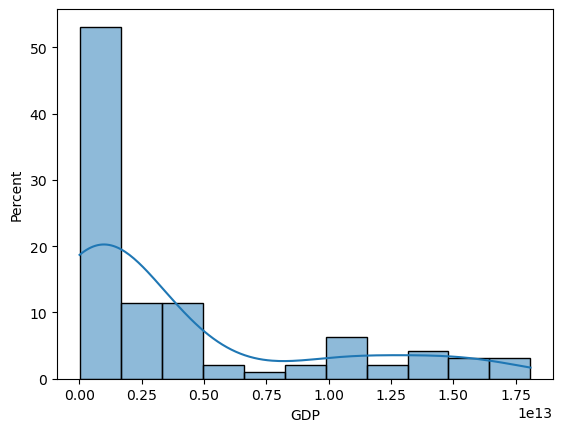

In [214]:
sns.histplot(data = l_e.GDP, stat = "percent", kde=True)
plt.show()

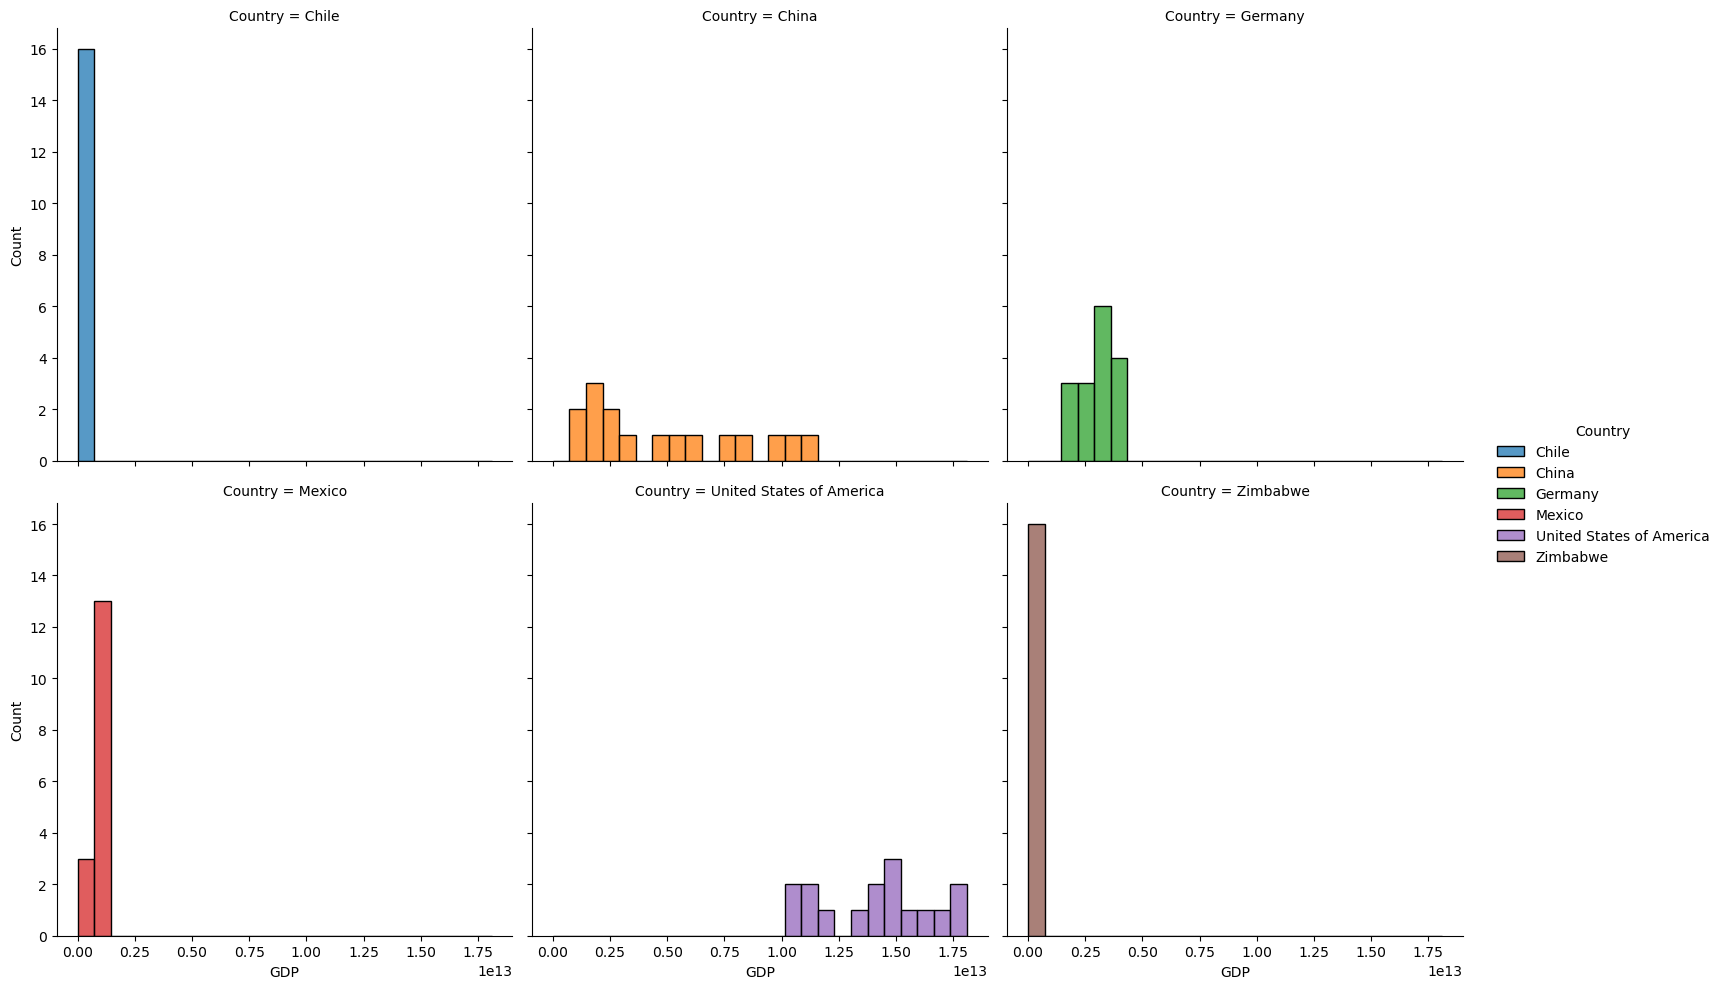

In [240]:
#GDP Distribution - USA Data is an outlier, the relatively higher numbers for China and Germany aren't enough to prevent the right skew 
sns.displot(x = "GDP", data = l_e, hue ='Country', multiple="stack",col_wrap=3, col = 'Country', bins = 25)


#plt.ylabel("GDP")
#plt.xlabel("Year")
plt.show()

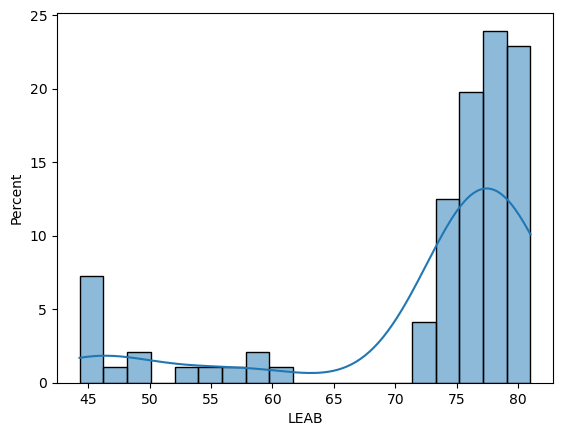

In [242]:
#different from GDP, LEAB distribution is left skewed. Majority of observations have a higher LEAB, so on total the variable grew over time

sns.histplot(l_e["LEAB"], stat = "percent", kde=True)
plt.show()

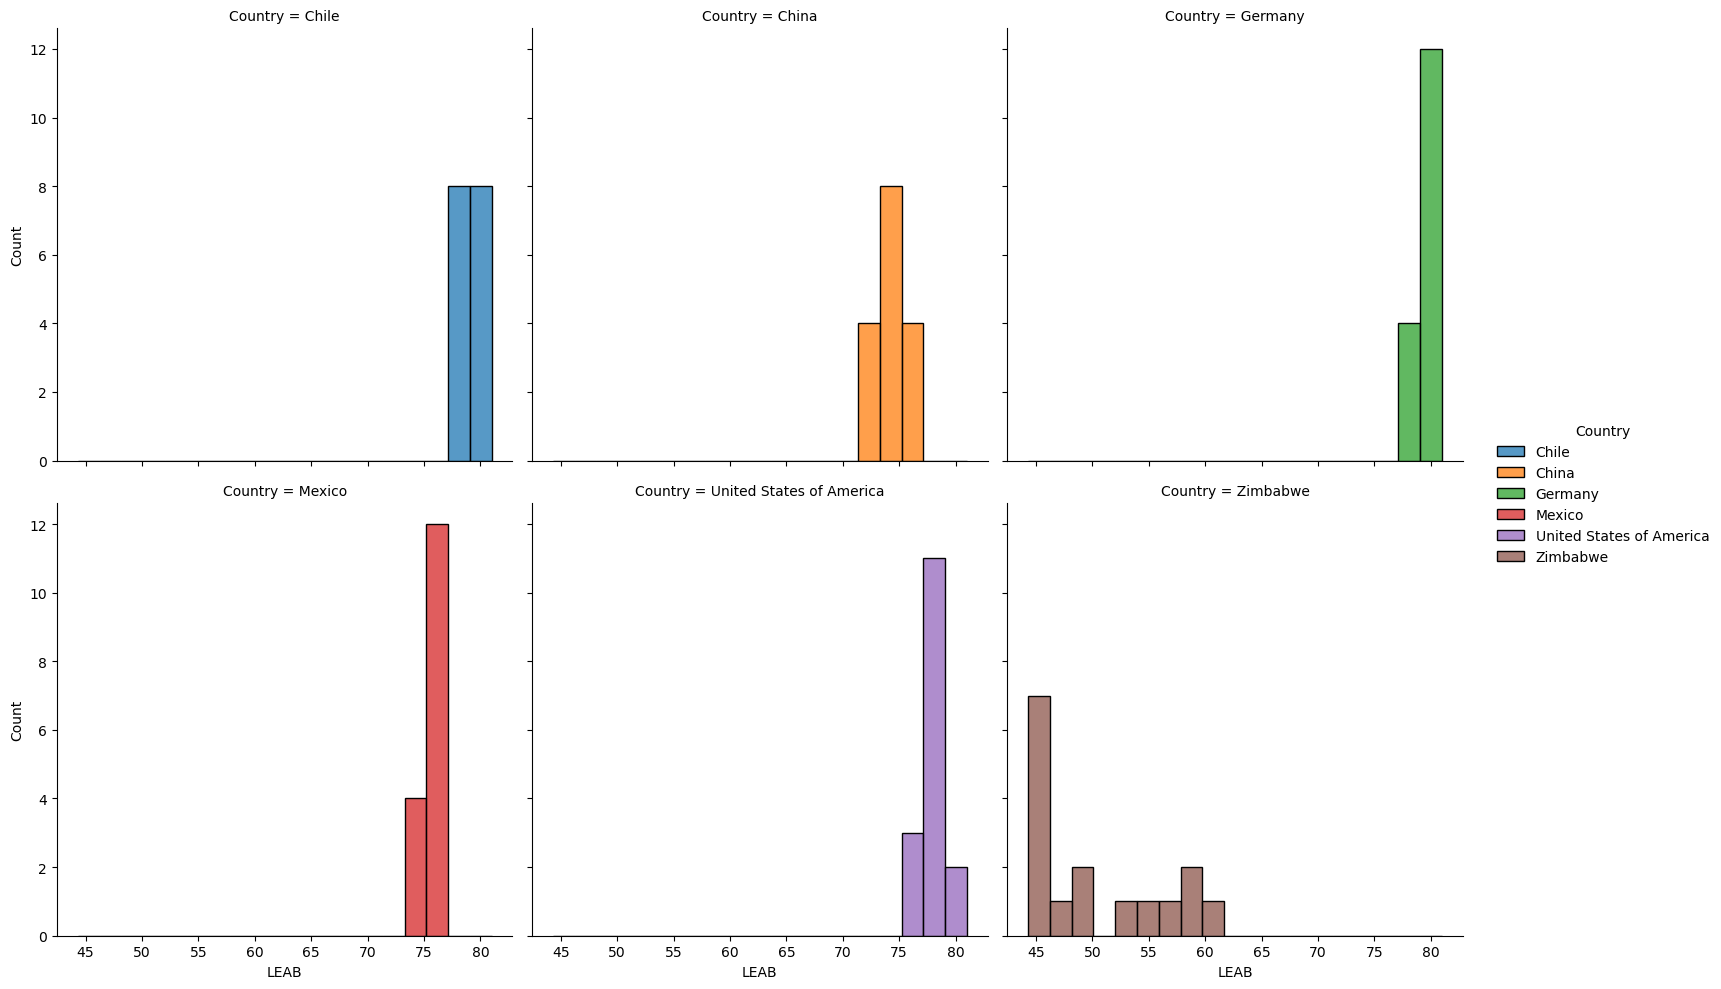

In [246]:
#LEAB Distributions for each country. Only Zimbabwe is on the left side,the majority of the values overweight it though, 
#so the left skew stands

sns.displot(x = "LEAB", data = l_e, hue ='Country', multiple="stack",col_wrap=3, col = 'Country')

#plt.ylabel("GDP")
#plt.xlabel("Year")
plt.show()

2. Changes in LEAB and GDP over years

Plotting to compare the Life expectancy of birth for all 6 countries over the years, using relplot (line)
Findings: it did rise for all 6 parties. It rose the most for Zimbabwe, but still stayed way lower than the rest

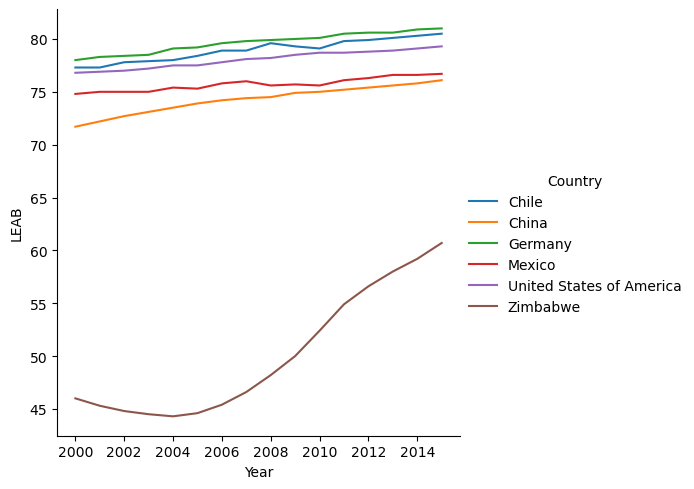

In [250]:
sns.relplot(x = "Year", y = "LEAB", data = l_e, hue = "Country", kind="line")

plt.ylabel("LEAB")
plt.xlabel("Year")
plt.show()

Plotting to compare the GDP for all 6 countries over the years, using relplot (line)
Findings: it did rise for 5 parties and stayed the same for Zimbabwe. For Chile and Mexico it rose insiginificantly
the biggest lunge was in China in 2006-2010. 

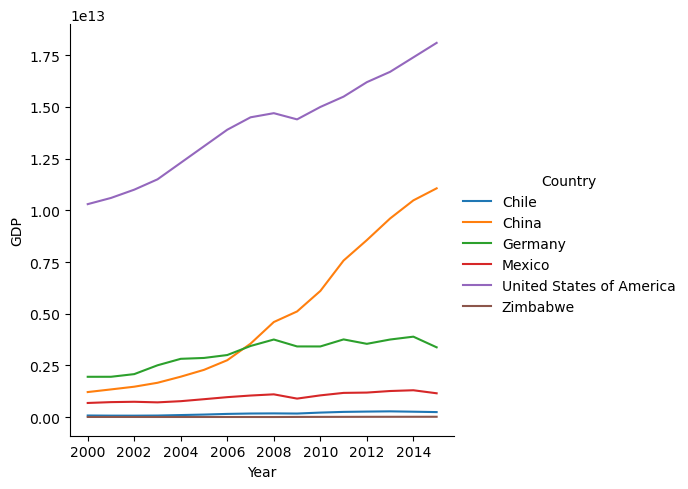

In [252]:
sns.relplot(x = ("Year"), y = ("GDP"), data = l_e, hue = ("Country"), kind="line")


plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

3. Is there a connection between GDP and LEAB numbers?

Scatter plots are a good way to answer that question

some observations:
Zimbabwe 0 change in GDP , but massive change in LEAB
China and USA had massive rises in GDP and moderate ones in LEAB
the highest LEAB is not in the countries with the highest GDP, but in Germany and Chile

the direct interrelatedness of two variables is to be questioned, it might be heavily dependend on further factors (might be cultural, historical etc.)

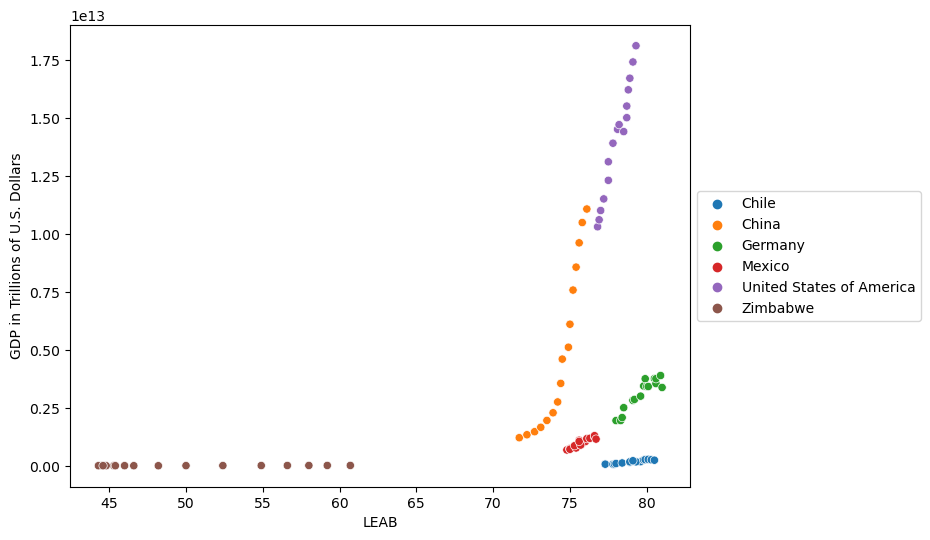

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=l_e.LEAB, y=l_e.GDP, hue=l_e.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

4. is choice of these 6 countries representative for making broader assumptions about variable correlation?
  
First let us plot both LEAB and GDP side to side in categorical bar charts:

LEAB: as expected the strongest numbers are at Chile and Germany
The same exercise with GDP: reveals the earlier found trend even more drastically. compared to USA Chile barely even rose in GDP

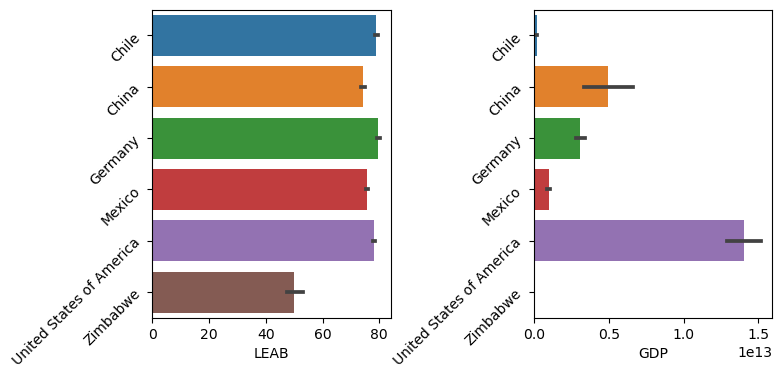

In [254]:
plt.figure(figsize = (8,4))
ax = plt.subplot(1,2,1)
sns.barplot(x = "LEAB", y = "Country", data = l_e)
plt.ylabel("")
plt.yticks(rotation=45)
plt.subplots_adjust(wspace = 0.6)
ax = plt.subplot(1,2,2)
sns.barplot(x = "GDP", y = "Country", data = l_e)
plt.ylabel("")
plt.yticks(rotation=45)

plt.show()

In [165]:
#compared to USA Chile barely even rose in GDP
#the comparison of Zimbabwe to USA: relationship betwee GDP and LEAB looks similar for both countries, but US GDP is counted in trillions, 
#vs billions in Zimbabwe
print(l_e_USA.GDP.max())
print(l_e_USA.GDP.min())

print(l_e_zimbabwe.GDP.max())
print(l_e_zimbabwe.GDP.min())

18100000000000.0
10300000000000.0
16304667807.0
4415702800.0


(array([3., 1., 1., 1., 1., 3., 2., 1., 1., 2.]),
 array([1.030e+13, 1.108e+13, 1.186e+13, 1.264e+13, 1.342e+13, 1.420e+13,
        1.498e+13, 1.576e+13, 1.654e+13, 1.732e+13, 1.810e+13]),
 <BarContainer object of 10 artists>)

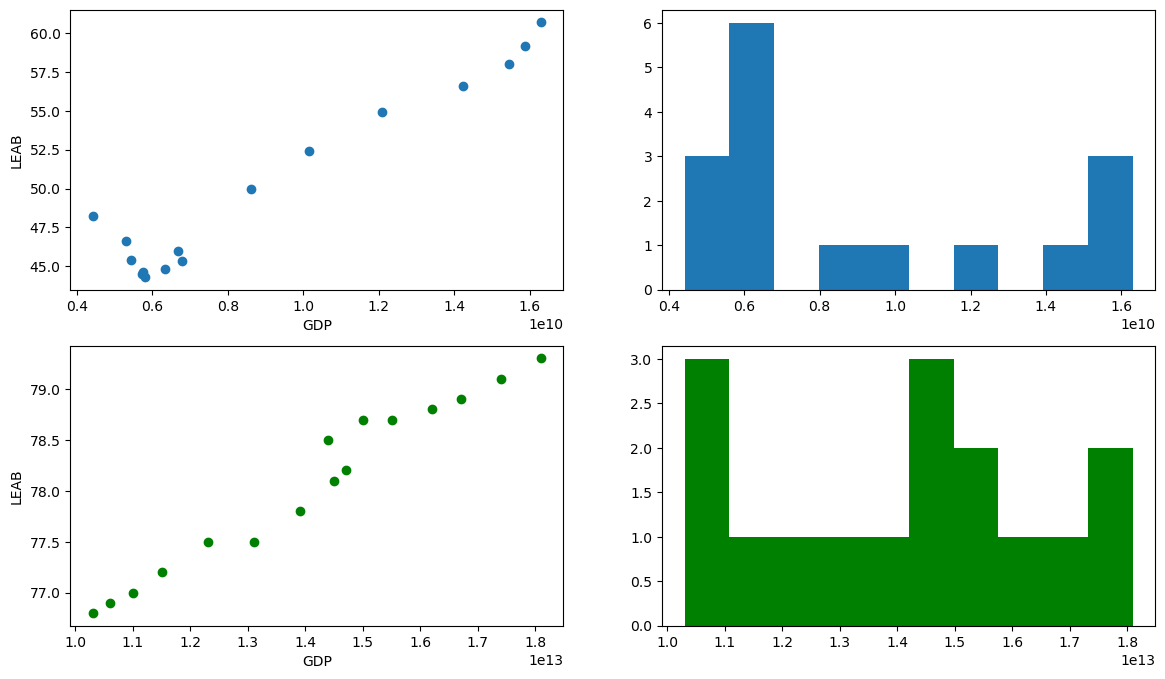

In [258]:
#Here is how it looks in graphs - notice the le10 vs le13 in every graph

fig, axs = plt.subplots(2,2, figsize=(14,8))
axs[0,0].scatter(l_e_zimbabwe.GDP, l_e_zimbabwe.LEAB)
axs[0,0].set_xlabel("GDP")
axs[0,0].set_ylabel("LEAB")
axs[0,1].hist(l_e_zimbabwe.GDP)

axs[1,0].scatter(l_e_USA.GDP, l_e_USA.LEAB, color = "green")
axs[1,0].set_xlabel("GDP")
axs[1,0].set_ylabel("LEAB")
axs[1,1].hist(l_e_USA.GDP, color = "green")

#CONCLUSIONS

GDP over the years:

- rose for 5 parties and stayed the same for Zimbabwe. For Chile and Mexico it rose insiginificantly
- the biggest lunge was in China in 2006-2010. 

LEAB over the years
- rose for all 6 parties. It rose the most for Zimbabwe, but still stayed way lower than the rest.
- interestingly the highest LEAB values were registered not in China and US, but Chile and Germany 
